#  <font color='dimgray'>  <center>Time series - Furniture sales forecast</div>


#  <font color='teal'> Business scenario :

Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc. To do this analysis, the owner first has to segregate the data by category and analyze each entity
separately. For each entity, a forecast can be estimated based on the past sales of that entity. The idea behind this is to find out the popularity of a certain product and how its sales can impact the business.

Every product category is unique and cater to different customer base. So the analysis cannot be
generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.

## Data:

The customer dataset has about 9994 records in a CSV format.

#  <font color='teal'>Step 1: Environment setup



### Importing necessary packages
  

In [1]:
import pandas as pd #for handling dataset
import numpy as np #for numerical operations

#for graphs
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
plt.style.use('fivethirtyeight')

#to handle the warnings
from warnings import filterwarnings
filterwarnings('ignore')

#  <font color='teal'>Step 2: Read & Understand Dataset

In [2]:
sales_df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',parse_dates=['Order Date']) # Loading the data

sales_df.head() #to print first 5 records of dataset

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

### Datset information

In [3]:
sales_df.info() #checking the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Dataset structure

In [4]:
print('Structure of the datset:',sales_df.shape) #checking the shape of dataset

Structure of the datset: (9994, 21)


### Dataset description

In [5]:
sales_df.describe() #data description

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

#  <font color='teal'>Step 3:Data preprocressing

### Checking null values

In [6]:
sales_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### <div class="alert alert-warning">Interpretation: 
  - No null values are present in the dataset.</div>

## Filtering the data as per category for eda and forecast of particular category

In [7]:
sales_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
furniture = sales_df.loc[sales_df['Category'] == 'Furniture']
furniture.head(2)

Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ... Postal Code  Region  \
0   Claire Gute  Consumer  United States  Henderson  ...       42420   South   
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  

[2 rows x 21 columns]

In [9]:
office_supp = sales_df.loc[sales_df['Category'] == 'Office Supplies']
office_supp.head(2)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name   Sales  Quantity  \
2  Self-Adhesive Address Labels for Typewriters b...  14.620         2   
4                     Eldon Fold 'N Roll Cart System  22.368         2   

   Discount  Profit  
2       0.0  6.8714  
4       0.2  2.5164  

[2 rows x 21 columns]

In [10]:
tech = sales_df.loc[sales_df['Category'] == 'Technology']
tech.head(2)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
7        8  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
11      12  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

      Customer Name   Segment        Country         City  ... Postal Code  \
7   Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
11  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   

    Region       Product ID    Category Sub-Category  \
7     West  TEC-PH-10002275  Technology       Phones   
11    West  TEC-PH-10002033  Technology       Phones   

                                     Product Name    Sales  Quantity  \
7                  Mitel 5320 IP Phone VoIP phone  907.152         6   
11  Konftel 250 Conference phone - Charcoal black  911.424         4   

    Discount   Profit  
7        0.2  90.7152  
11       0.2  68.3568  

[2 rows x 21 columns]

### Grouping the dataset

In [11]:
df = pd.DataFrame(furniture.groupby(['Order Date'])['Sales'].sum())
df2 = pd.DataFrame(office_supp.groupby(['Order Date'])['Sales'].sum())
df3 = pd.DataFrame(tech.groupby(['Order Date'])['Sales'].sum())


## <font color='teal'>Step 4:EDA 


## Profiling of the dataset

In [12]:
from pandas_profiling import ProfileReport# for profile report
design_report = ProfileReport(sales_df)#creating profile report
design_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

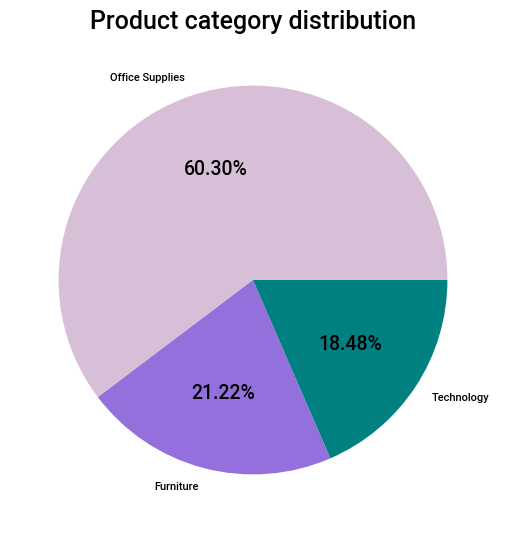

In [14]:
plt.figure(figsize=(10,6))
percentage = sales_df['Category'].value_counts()         
labels = list(sales_df['Category'].value_counts().index)
color = ['thistle','mediumpurple','teal']
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",colors=color)
plt.title('Product category distribution',fontweight='bold',fontsize=18)
plt.show()

#### <div class="alert alert-warning"> Interpretation:
__The products are divided into 3 categories of which the largest data is of office supplies category and lowest is of technology.__</div>

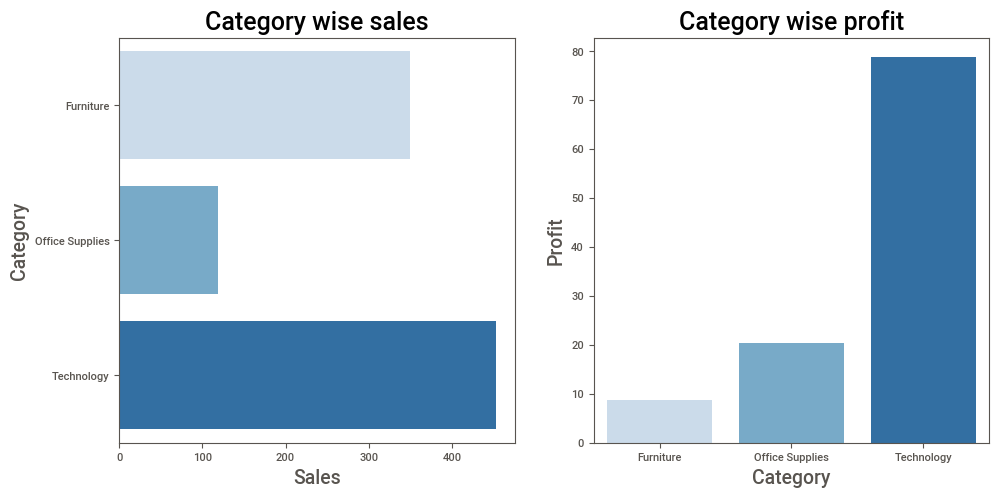

In [15]:
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
plt.title("Category wise sales",fontweight='bold',fontsize=18)
sns.barplot(y=sales_df['Category'], x=sales_df['Sales'],palette='Blues',ci=None)

plt.subplot(1,2,2)
plt.title("Category wise profit",fontweight='bold',fontsize=18)
sns.barplot(x=sales_df['Category'], y=sales_df['Profit'],palette='Blues',ci=None)

plt.show()

#### <div class="alert alert-warning"> Interpretation:
- Technology category has the highest number of sales and profit.
- Office supplies has less number of less and furniture category has less number of profit.</div>

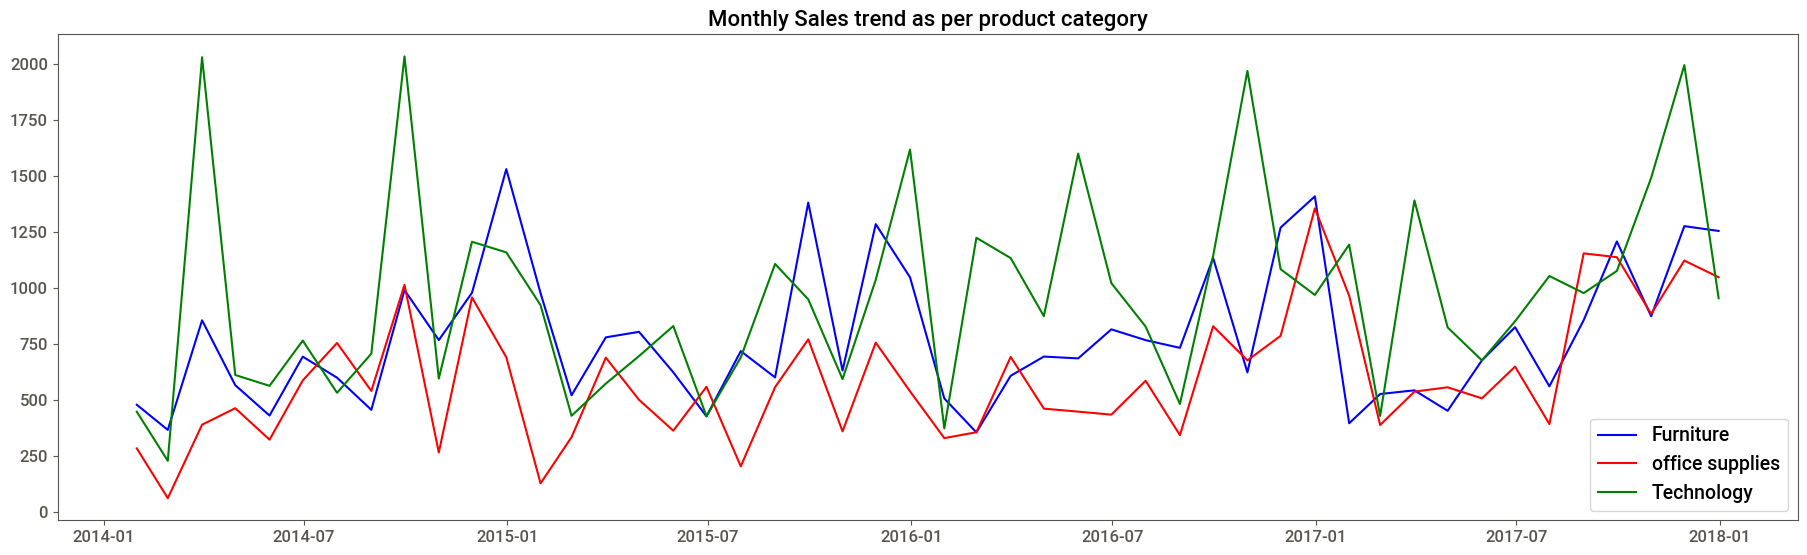

In [16]:
plt.figure(figsize=(20,6))

m= df.resample('M').mean()
m2 = df2.resample('M').mean()
m3= df3.resample('M').mean()

plt.title('Monthly Sales trend as per product category',fontweight='bold',fontsize=16)

plt.plot(m,c='blue',label='Furniture')
plt.plot(m2,c='red',label='office supplies')
plt.plot(m3,c='green',label='Technology')
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

#### <div class="alert alert-warning"> Interpretation:
- we can observe each category wise trend present in the dataset.
- Sales of technology are higher and sales of office supplies are low.</div>

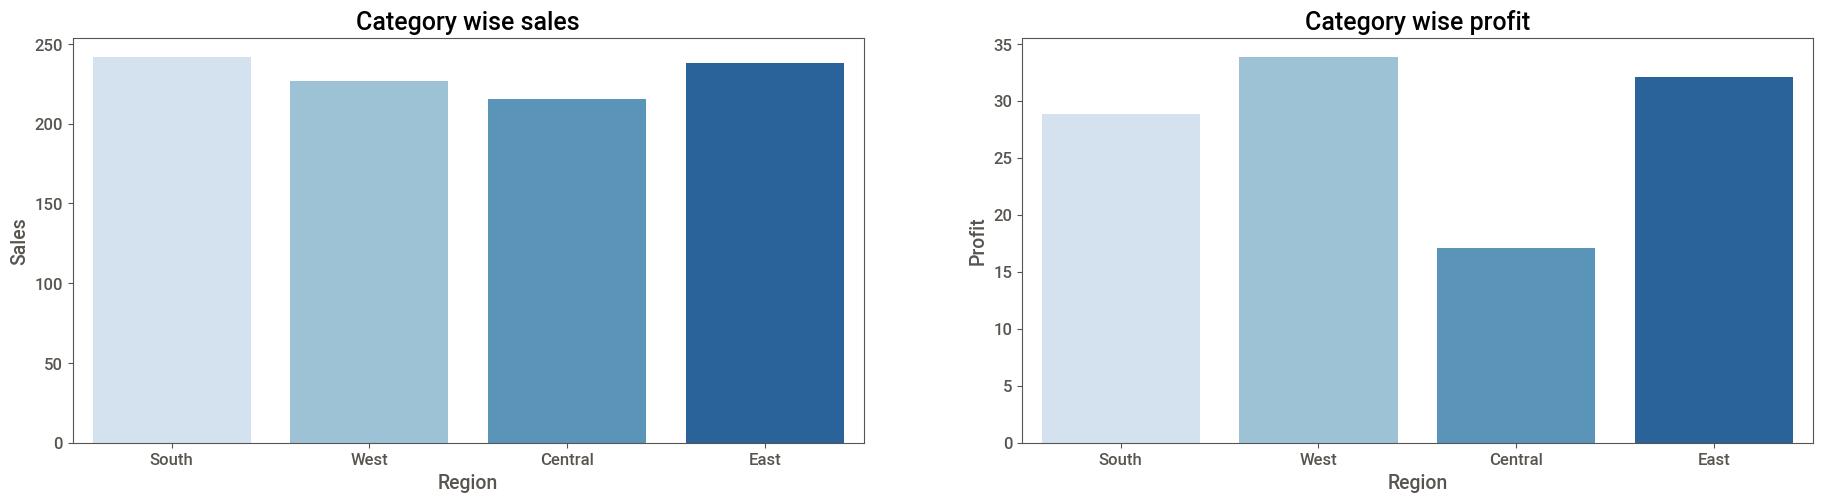

In [17]:
plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.title("Category wise sales",fontweight='bold',fontsize=18)
sns.barplot(x=sales_df['Region'], y=sales_df['Sales'],palette='Blues',ci=None)
plt.tick_params(labelsize=12)

plt.subplot(1,2,2)
plt.title("Category wise profit",fontweight='bold',fontsize=18)
sns.barplot(x=sales_df['Region'], y=sales_df['Profit'],palette='Blues',ci=None)
plt.tick_params(labelsize=12)

plt.show()

#### <div class="alert alert-warning"> Interpretation:
- South and east region has the highest number of sales.
- Profit is higher in west region.</div>

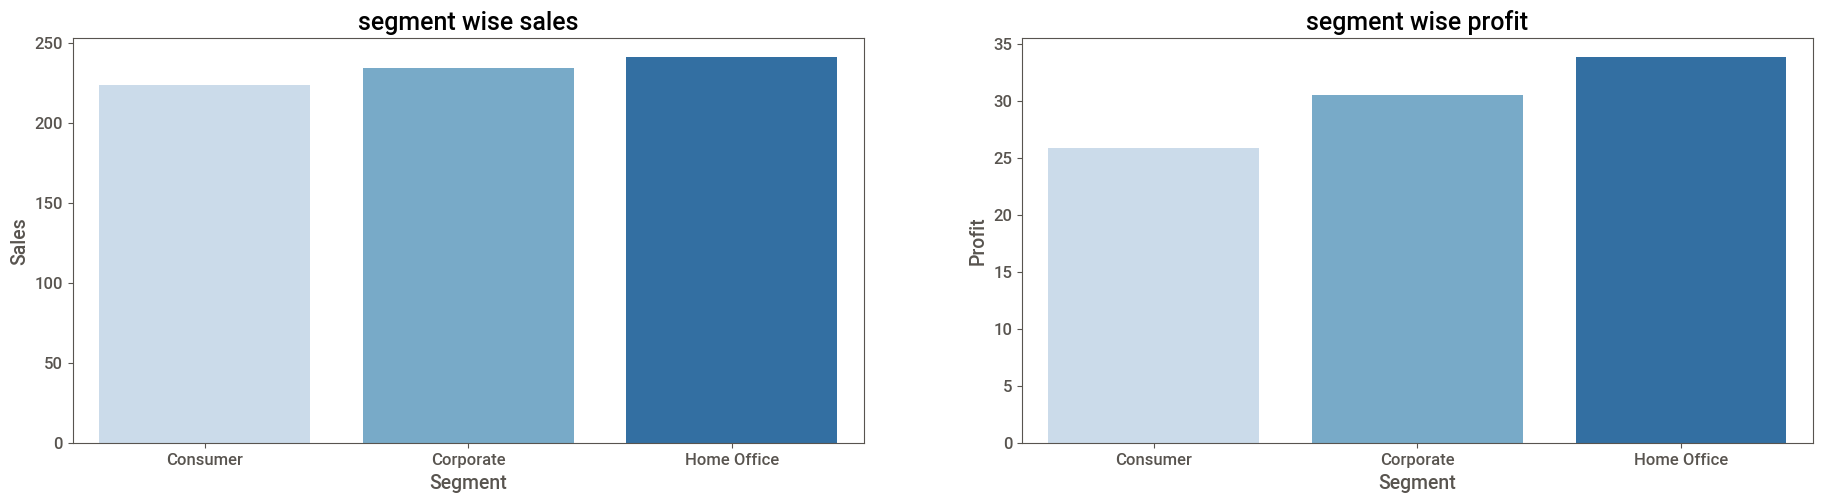

In [18]:
plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.title("segment wise sales",fontweight='bold',fontsize=18)
sns.barplot(x=sales_df['Segment'], y=sales_df['Sales'],palette='Blues',ci=None)
plt.tick_params(labelsize=12)

plt.subplot(1,2,2)
plt.title("segment wise profit",fontweight='bold',fontsize=18)
sns.barplot(x=sales_df['Segment'], y=sales_df['Profit'],palette='Blues',ci=None)
plt.tick_params(labelsize=12)

plt.show()

#### <div class="alert alert-warning"> Interpretation:
- Sales and profit are higher in Home-office segment and less in consumer segement.</div>

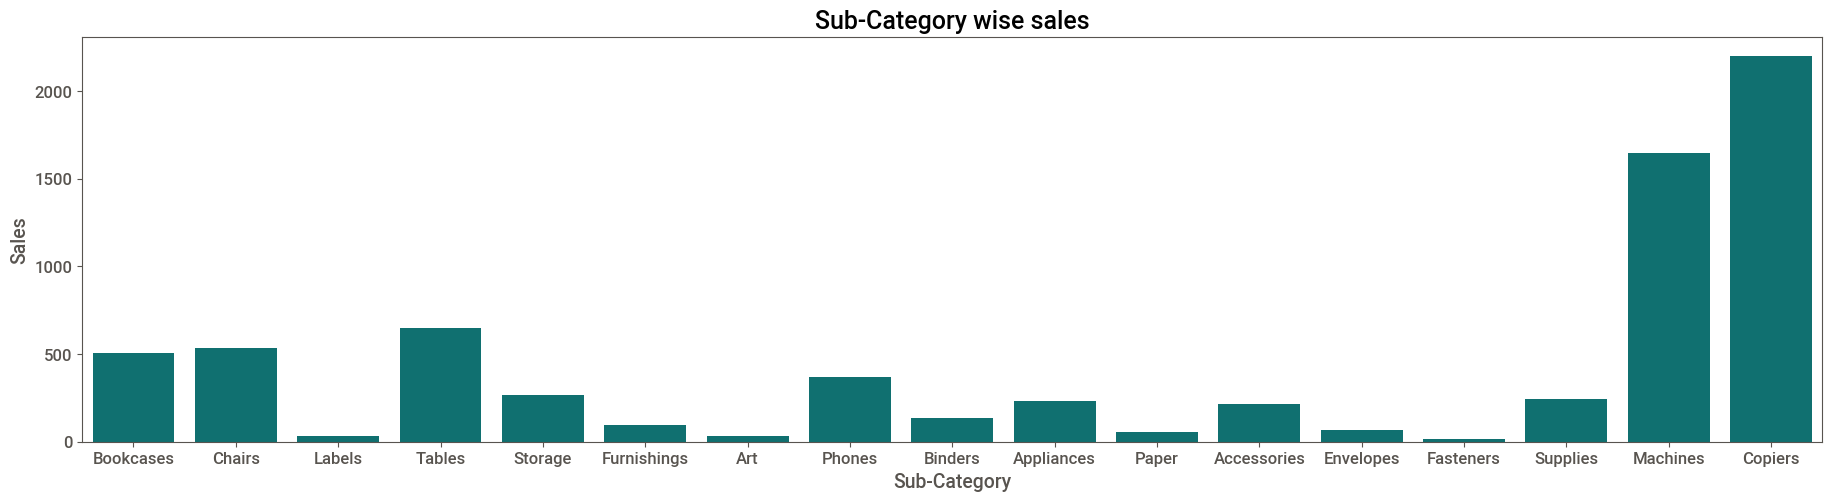

In [19]:
plt.figure(figsize =(20,5))

plt.title("Sub-Category wise sales",fontweight='bold',fontsize=18)
sns.barplot(x=sales_df['Sub-Category'], y=sales_df['Sales'],color='teal',ci=None)
plt.tick_params(labelsize=12)
plt.show()

#### <div class="alert alert-warning"> Interpretation:
- Copiers sub-category has the highest number of sales.</div>

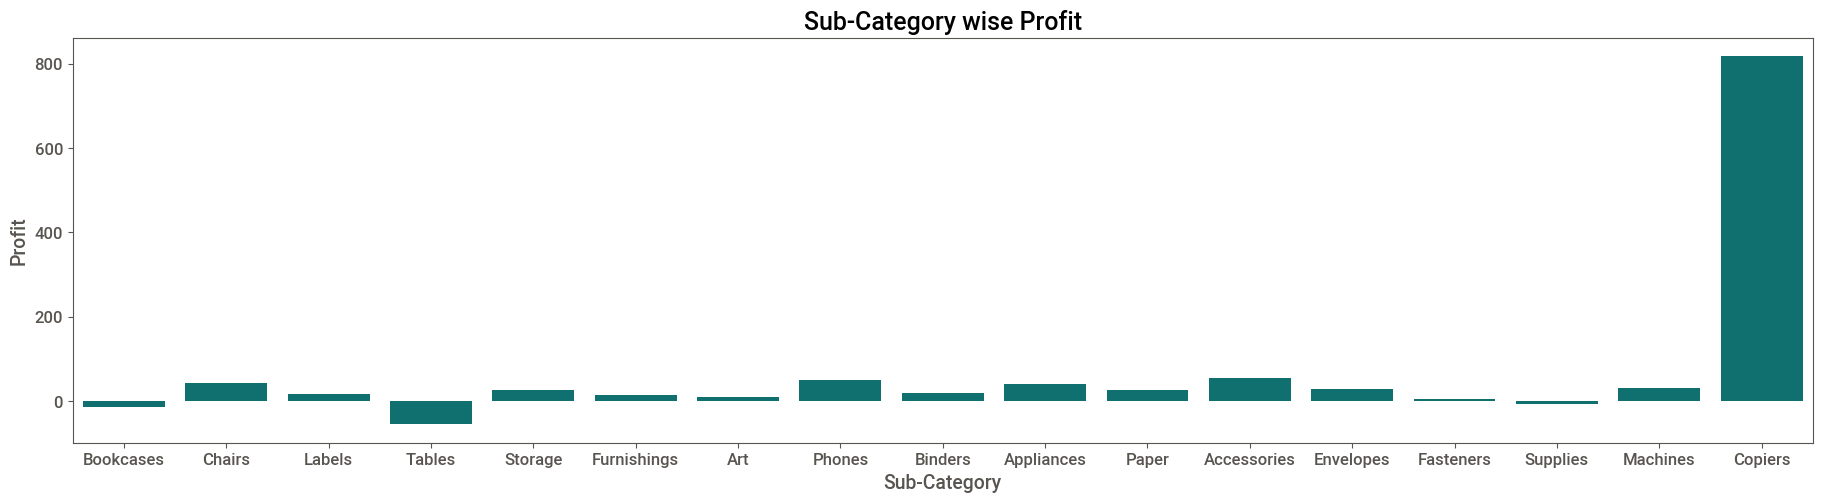

In [20]:
plt.figure(figsize =(20,5))

plt.title("Sub-Category wise Profit",fontweight='bold',fontsize=18)
sns.barplot(x=sales_df['Sub-Category'], y=sales_df['Profit'],color='teal',ci=None)
plt.tick_params(labelsize=12)
plt.show()

#### <div class="alert alert-warning"> Interpretation:
- Copiers sub-category has the highest number of profit and the profit of tables sub-category is negative.</div>

#### <div class="alert alert-warning"> As our business objective is to  Build a forecast model to predict the furniture sales of a certain store.We will use furniture dataframe for further analysis.</div>

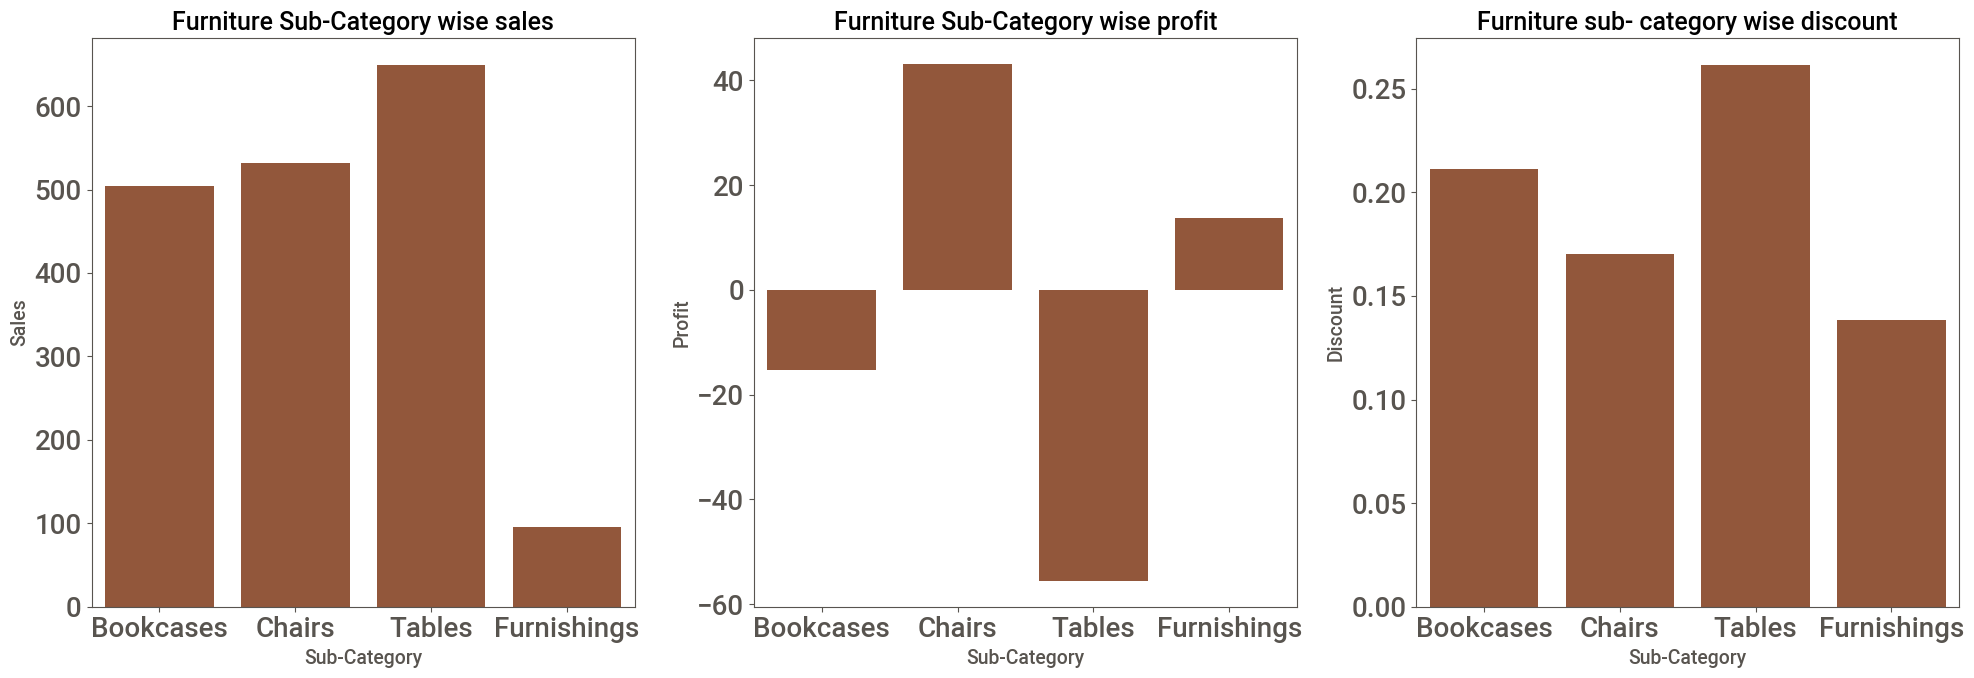

In [21]:
plt.figure(figsize =(20,7))

plt.subplot(1,3,1)
plt.title("Furniture Sub-Category wise sales",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Sub-Category'], y=furniture['Sales'],color='sienna',ci=None)
plt.tick_params(labelsize=20)

plt.subplot(1,3,2)
plt.title("Furniture Sub-Category wise profit",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Sub-Category'], y=furniture['Profit'],color='sienna',ci=None)
plt.tick_params(labelsize=20)

plt.subplot(1,3,3)
plt.title("Furniture sub- category wise discount",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Sub-Category'], y=furniture['Discount'],color='sienna',ci=None)
plt.tick_params(labelsize=20)


plt.tight_layout()
plt.show()


#### <div class="alert alert-warning"> Interpretation:
- Tables has highest number of sales and furnishings has lowest number of sales in furniture category.
- The highest profit in furniture category is through sub category chairs and the highest loss is from the subcategory tables.
- Tables subcategory has the highest discount which was the reason of increase in sales of tables.</div>

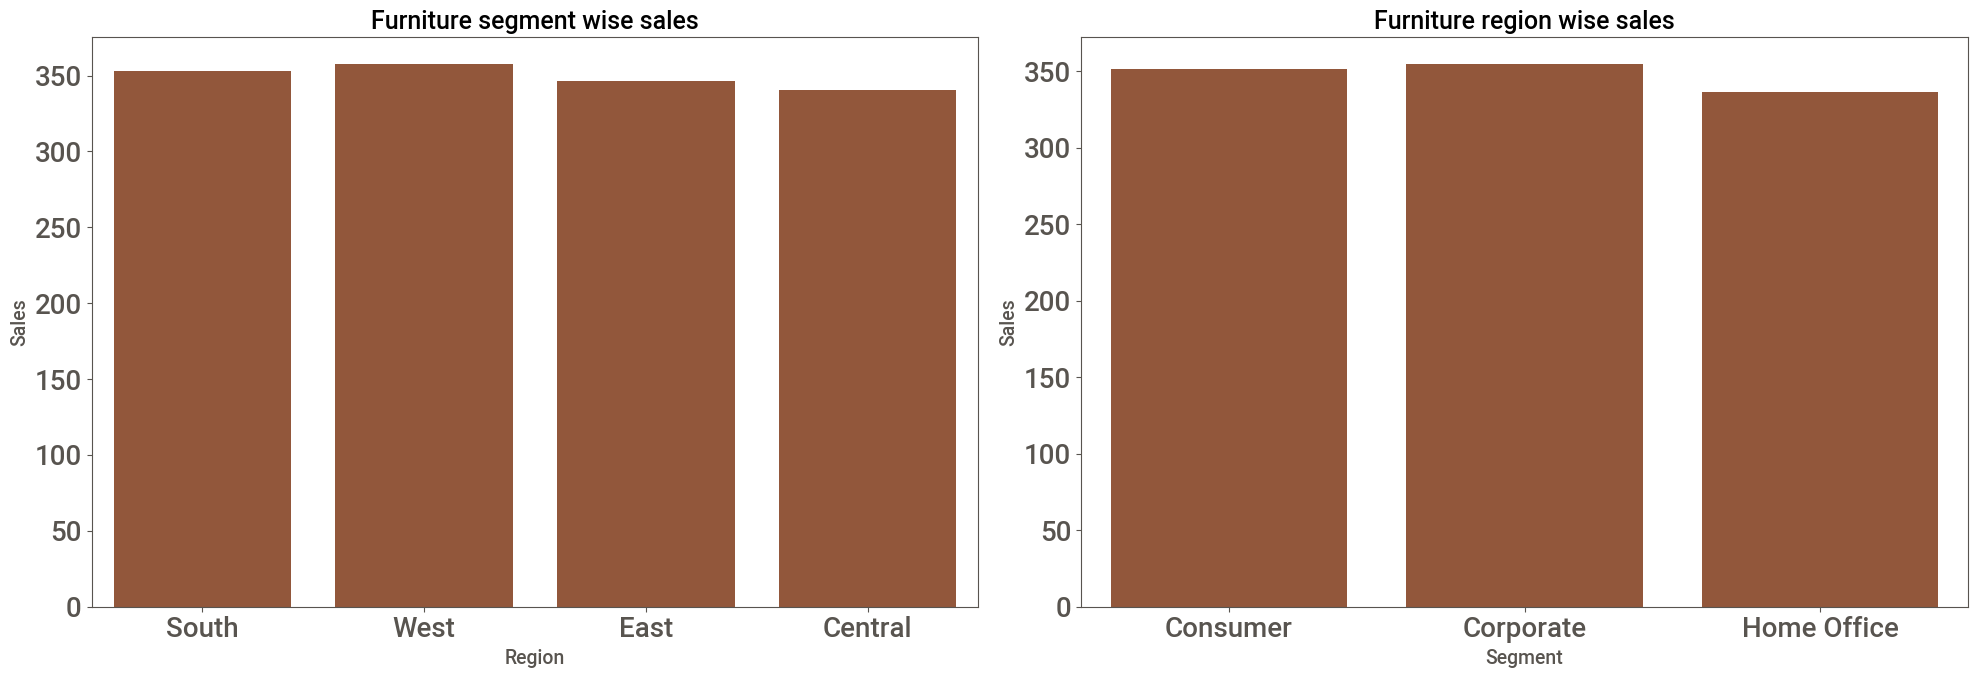

In [22]:
plt.figure(figsize =(20,7))

plt.subplot(1,2,1)
plt.title("Furniture segment wise sales",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Region'], y=furniture['Sales'],color='sienna',ci=None)
plt.tick_params(labelsize=20)

plt.subplot(1,2,2)
plt.title("Furniture region wise sales",fontweight='bold',fontsize=18)
sns.barplot(x=furniture['Segment'], y=furniture['Sales'],color='sienna',ci=None)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

#### <div class="alert alert-warning"> Interpretation:
- West region has the highest sales in furniture category and corporate segment has highest sales in funriture category.</div>

### Calcluating the total years present in furniture data

In [23]:
print('Start date:',furniture['Order Date'].min()),
print('End date:',furniture['Order Date'].max())

Start date: 2014-01-06 00:00:00
End date: 2017-12-30 00:00:00


#### <div class="alert alert-warning"> We have total 4 years of data present in the furniture category</div>

__For analysis we will consider weekly data__

In [24]:
w= df.resample('W').mean() #resampling data as weekly

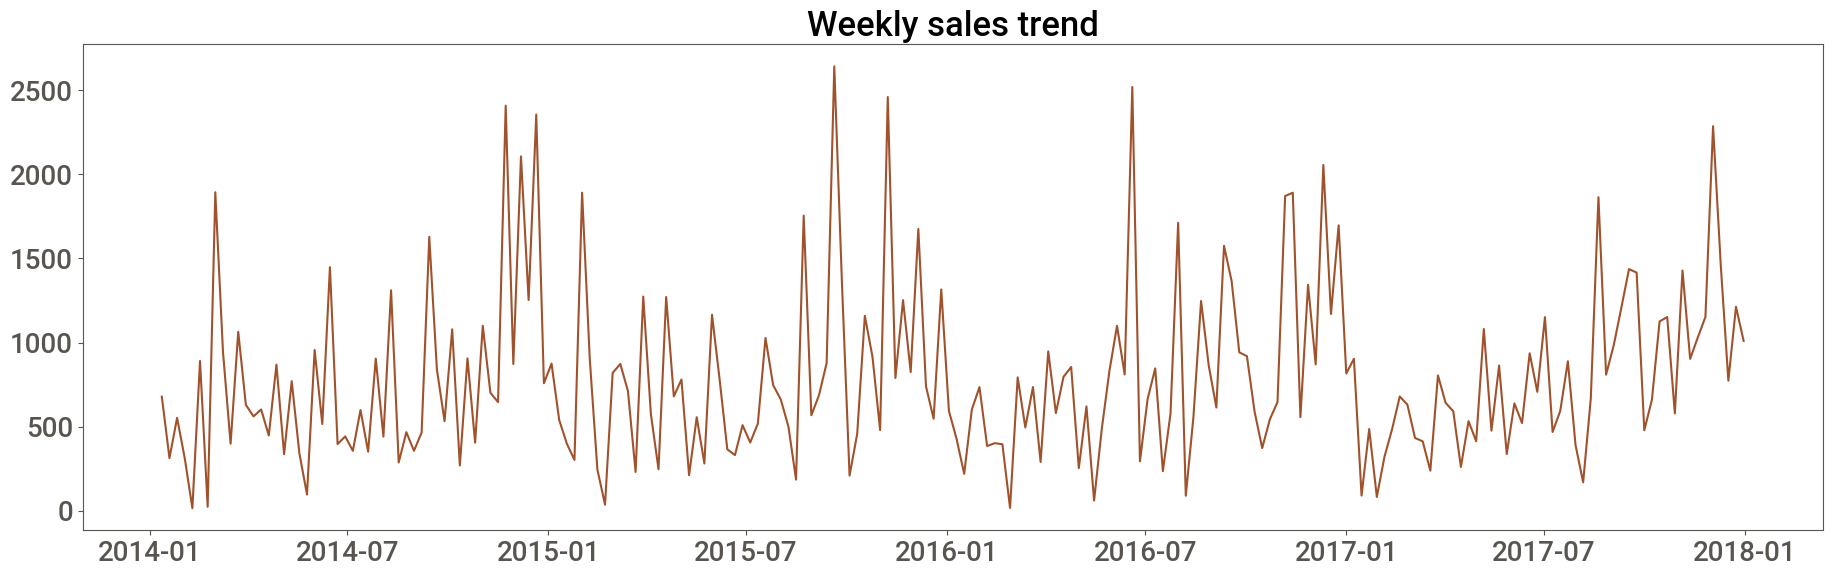

In [25]:
plt.figure(figsize=(20,6))
plt.title('Weekly sales trend',fontsize=25)
plt.plot(w,c='sienna',label='Furniture')
plt.tick_params(labelsize=20)
plt.show()

#### <div class="alert alert-warning"> Interpretation:
- The visual shows the weekly sales which took place for 4 years that is from 2014 to 2018.
- We can see some trend and seaonality present.We will further decompose to check more properly</div>

## Decomposing the data

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose #to decompose time series data

In [27]:
#time series components
decomp = seasonal_decompose(w,period = 52)

In [28]:
d_trend = decomp.trend #trend in the data
d_seasonal = decomp.seasonal #seasonality in the data
d_residual = decomp.resid #residuals in the data

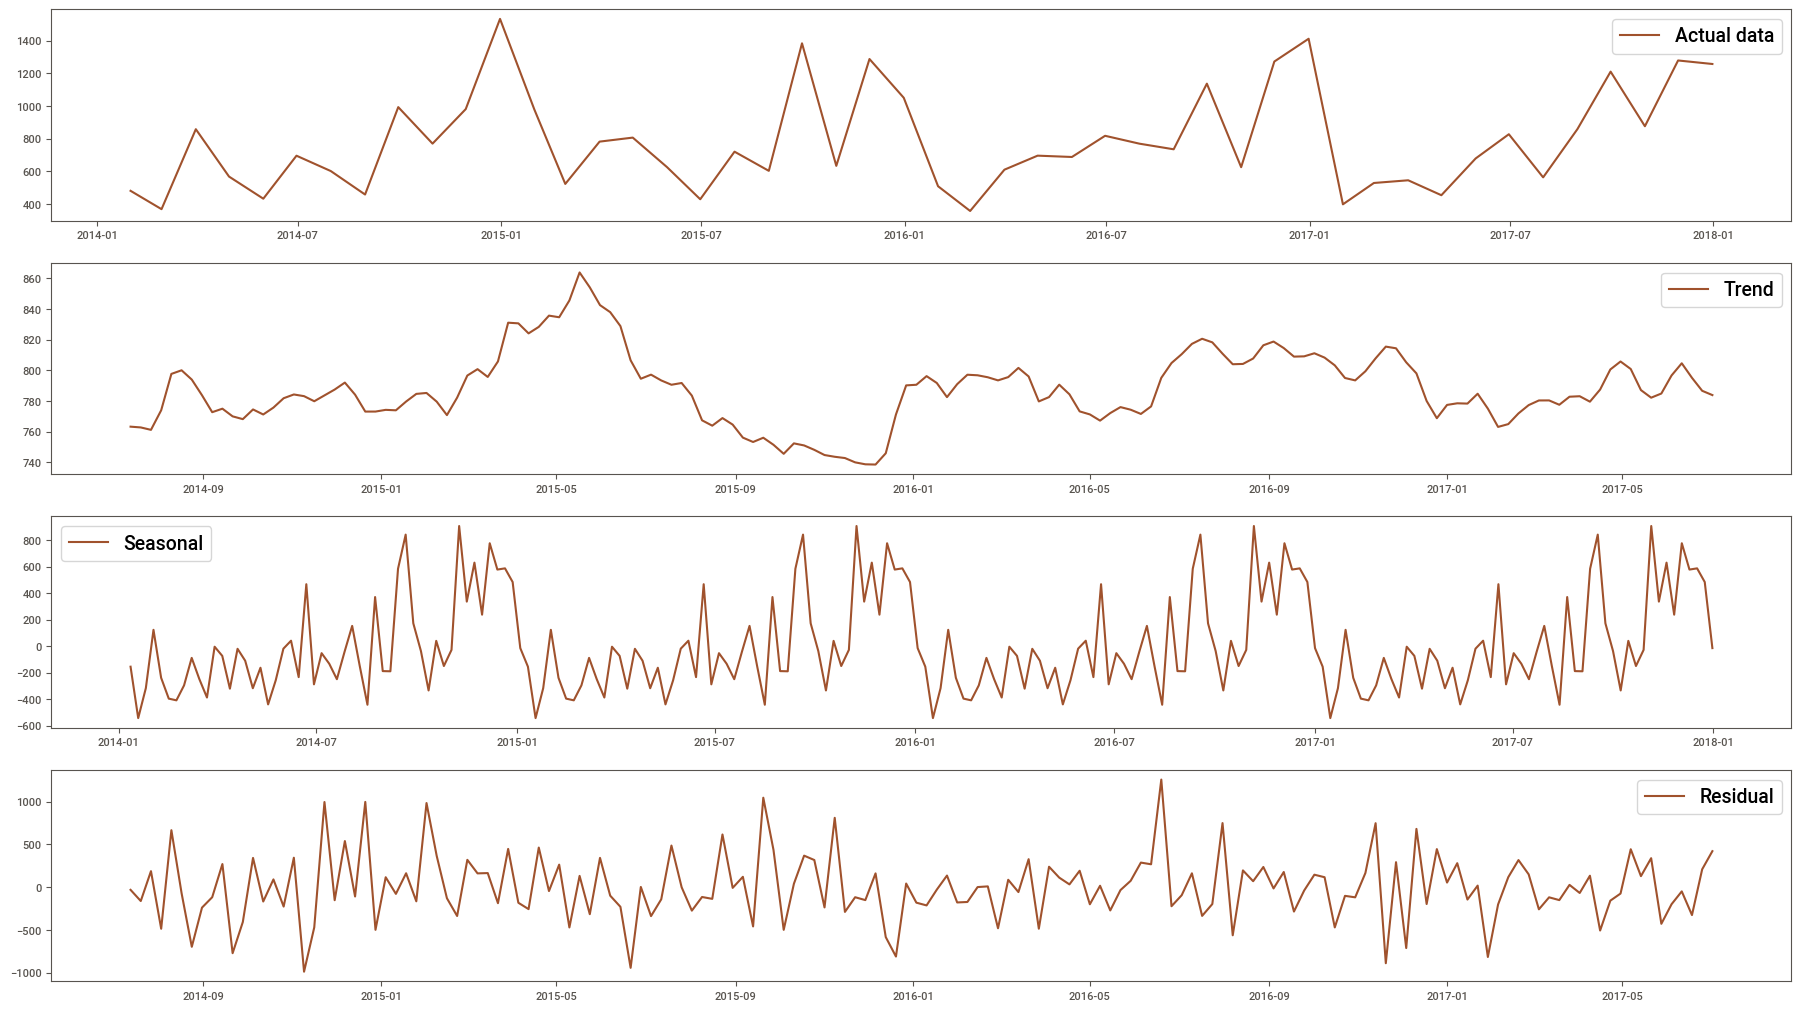

In [29]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(m,label='Actual data',color='sienna')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend',color='sienna')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',color='sienna')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual',color='sienna')
plt.legend(loc='best')

plt.show()

### <div class="alert alert-warning">Interpretation:
  - The first visual shows the monthly sales which took place for 4 years that is from 2014 to 2018.
  - The second visual shows a trend in the furniture sales.
  - The third visual shows a repeating pattern that mean there is some seasonality.
  - The fourth visual shows the irregularities in the dataset.
    </div>

## <div class="alert alert-info">Step 5:Checking Stationarity of the data</div>

In [30]:
from statsmodels.tsa.stattools import adfuller #for dickey-fuller test

In [31]:
# dickey-fuller test for stationarity
def checkstationarity(data):
    pvalue=adfuller(data)[1] #[1] gives the pvalue from adfuller
    if pvalue< 0.05:
        ret='Data is stationary.Do model building'
    else:
        ret='Data is not stationary.Make the data stationary'
    return(ret)

In [32]:
checkstationarity(w)#checking the stationarity of the data

'Data is stationary.Do model building'

__Now, as the data is stationary we can move towards model building.__

## Calculating and plot ACF and PACF to get range of p and q

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #for acf and pacf plots

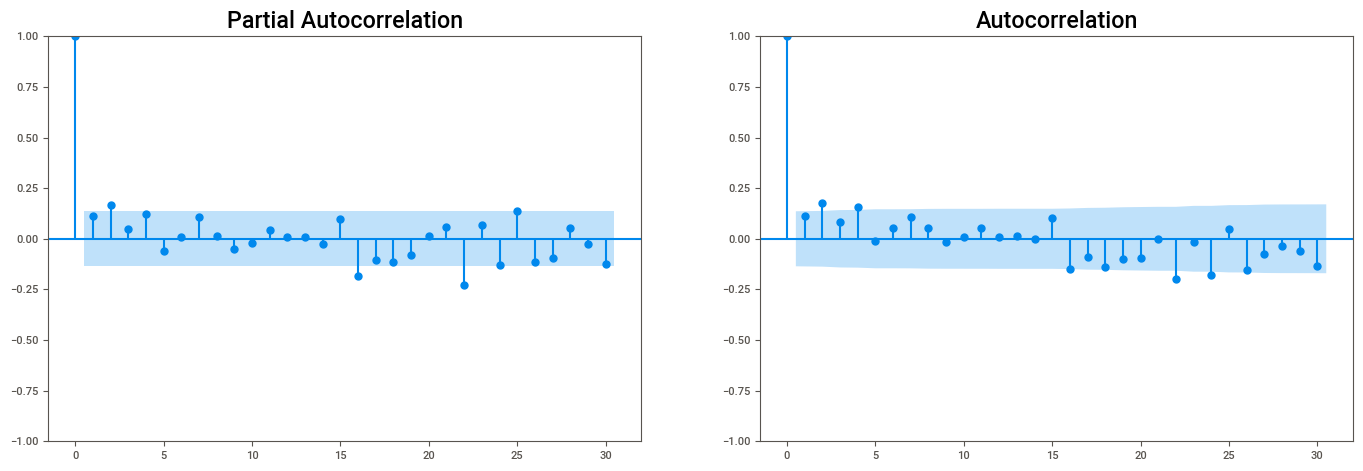

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plot_pacf(w ,lags=30,ax=ax[0]);
plot_acf(w ,lags=30,ax = ax[1]);

### <div class="alert alert-warning">Interpretation:
  The above visual shows the autocorrelation and partial autocorrelation of the data where p =3 and q=4
</div>

## <div class="alert alert-info">Step 5:Data Spliting</div>

In [35]:
# split the data into train and test
split = int(0.8 * len(w))

train = w.Sales.iloc[:split] #training
test =  w.Sales.iloc[split:] #testing
print("Train shape = {}, Test shape= {}".format(len(train), len(test))) 

Train shape = 166, Test shape= 42


## <div class="alert alert-info">Step 6:Modelling</div>

__As  seasonality is present in the dataset we will try two forecasting models:__

  - __SARIMA FORECASTING MODEL__
  - __SARIMAX FORECASTING MODEL__

# <div style = 'background-color:wheat'> <center>Time series forecasting with SARIMA </div>

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX #for sarima and sarimax modelling
import statsmodels.api as sm #for checking model goodness
from sklearn.metrics import mean_squared_error #for calculating errors

In [37]:
values=[]                                                  # We Create a list of all combintions 
for i in range(3):
    for j in range(4):
        values.append((i,0,j))                             #appending in empty list
values

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3)]

In [38]:
model=[]                                                
for i in range(3):
    for j in range(4): 
        m=sm.tsa.statespace.SARIMAX(train,order=(i,0,j),seasonal_order=(i,0,j,52)).fit()#model creation
        model.append(m)                                     # Append all the models into the list 
model

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
RMSE=[]
                                                        #we find the value of MSE RMSE of all possible models  
for i in model:
    forecast=i.fittedvalues
    rmse=mean_squared_error(train,forecast,squared=False)
    RMSE.append(rmse)

In [40]:
Sarima_models=pd.DataFrame(index=values) #creating dataframe
Sarima_models["RMSE"]=RMSE
Sarima_models.sort_values(by='RMSE') #sorting values

RMSE
(2, 0, 3)  528.058400
(1, 0, 3)  528.211890
(2, 0, 2)  531.432542
(1, 0, 1)  531.601926
(2, 0, 1)  532.083077
(1, 0, 2)  534.308009
(2, 0, 0)  583.759343
(0, 0, 3)  639.775725
(1, 0, 0)  661.196936
(0, 0, 2)  666.883347
(0, 0, 1)  730.849307
(0, 0, 0)  935.850142

__As error is low at order = (2,0,3)we will use it for model building.__

## Model Building

In [41]:
sarima_model = sm.tsa.statespace.SARIMAX(train,order=(2,0,3),seasonal_order =(2,0,3,52)).fit()
sarima_model

In [42]:
sarima_model.summary() #model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  166
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 52)   Log Likelihood               -1277.003
Date:                            Fri, 16 Dec 2022   AIC                           2576.005
Time:                                    21:53:26   BIC                           2610.237
Sample:                                01-12-2014   HQIC                          2589.900
                                     - 03-12-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2825      0.412      0.686      0.493      -0.525       1.090
ar.L2          0.7166      0.412      1.740      0.082      -0.091       1.524
ma.L1         -0.2579      0.426     -0.605      0.545      -1.093       0.577
ma.L2         -0.6292      0.437     -1.439      0.150      -1.486       0.228
ma.L3         -0.0819      0.092     -0.893      0.372      -0.261       0.098
ar.S.L52       0.2125     30.681      0.007      0.994     -59.921      60.346
ar.S.L104      0.7827     30.378      0.026      0.979     -58.757      60.322
ma.S.L52      -0.0625     31.812     -0.002      0.998     -62.413      62.287
ma.S.L104     -0.8336     25.902     -0.032      0.974     -51.600      49.933
ma.S.L156     -0.0714      4.737     -0.015      0.988      -9.355       9.212
sigma2       2.92e+05      0.002   1.53e+08      0.000    2.92e+05    2.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                75.39
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.33
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+26. Standard errors may be unstable.
"""

## Checking for model goodness by using Ljung box test

In [43]:
pvalue = sm.stats.acorr_ljungbox(sarima_model.resid,lags=[30],return_df=True)['lb_pvalue'].values 

if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


## Prediction of the sales

In [44]:
s_train_fcast = sarima_model.fittedvalues #predictions of the train data
s_train_fcast

Order Date
2014-01-12      0.000000
2014-01-19    405.847969
2014-01-26    396.316568
2014-02-02    388.450391
2014-02-09    422.030509
                 ...    
2017-02-12    686.245973
2017-02-19    706.487421
2017-02-26    721.353729
2017-03-05    831.542819
2017-03-12    693.267496
Freq: W-SUN, Length: 166, dtype: float64

In [45]:
sarima_forecast = sarima_model.forecast(len(test)) #forecasting test data
sarima_forecast

2017-03-19     791.549300
2017-03-26     674.033593
2017-04-02     811.714167
2017-04-09     742.695386
2017-04-16     762.827342
2017-04-23     806.544603
2017-04-30     664.101401
2017-05-07     765.826209
2017-05-14     632.657967
2017-05-21     691.269730
2017-05-28     803.904270
2017-06-04     823.432640
2017-06-11     848.146000
2017-06-18    1070.855797
2017-06-25     680.178336
2017-07-02     740.002388
2017-07-09     788.564475
2017-07-16     655.018747
2017-07-23     760.367450
2017-07-30     926.633284
2017-08-06     707.800990
2017-08-13     718.778020
2017-08-20     830.563536
2017-08-27     771.911140
2017-09-03     734.172346
2017-09-10     986.683148
2017-09-17     865.392590
2017-09-24     786.739545
2017-10-01     839.807498
2017-10-08     718.037327
2017-10-15     716.729223
2017-10-22     712.995684
2017-10-29     788.857914
2017-11-05     945.968803
2017-11-12     969.521607
2017-11-19     858.464557
2017-11-26     889.231048
2017-12-03     884.842760
2017-12-10  

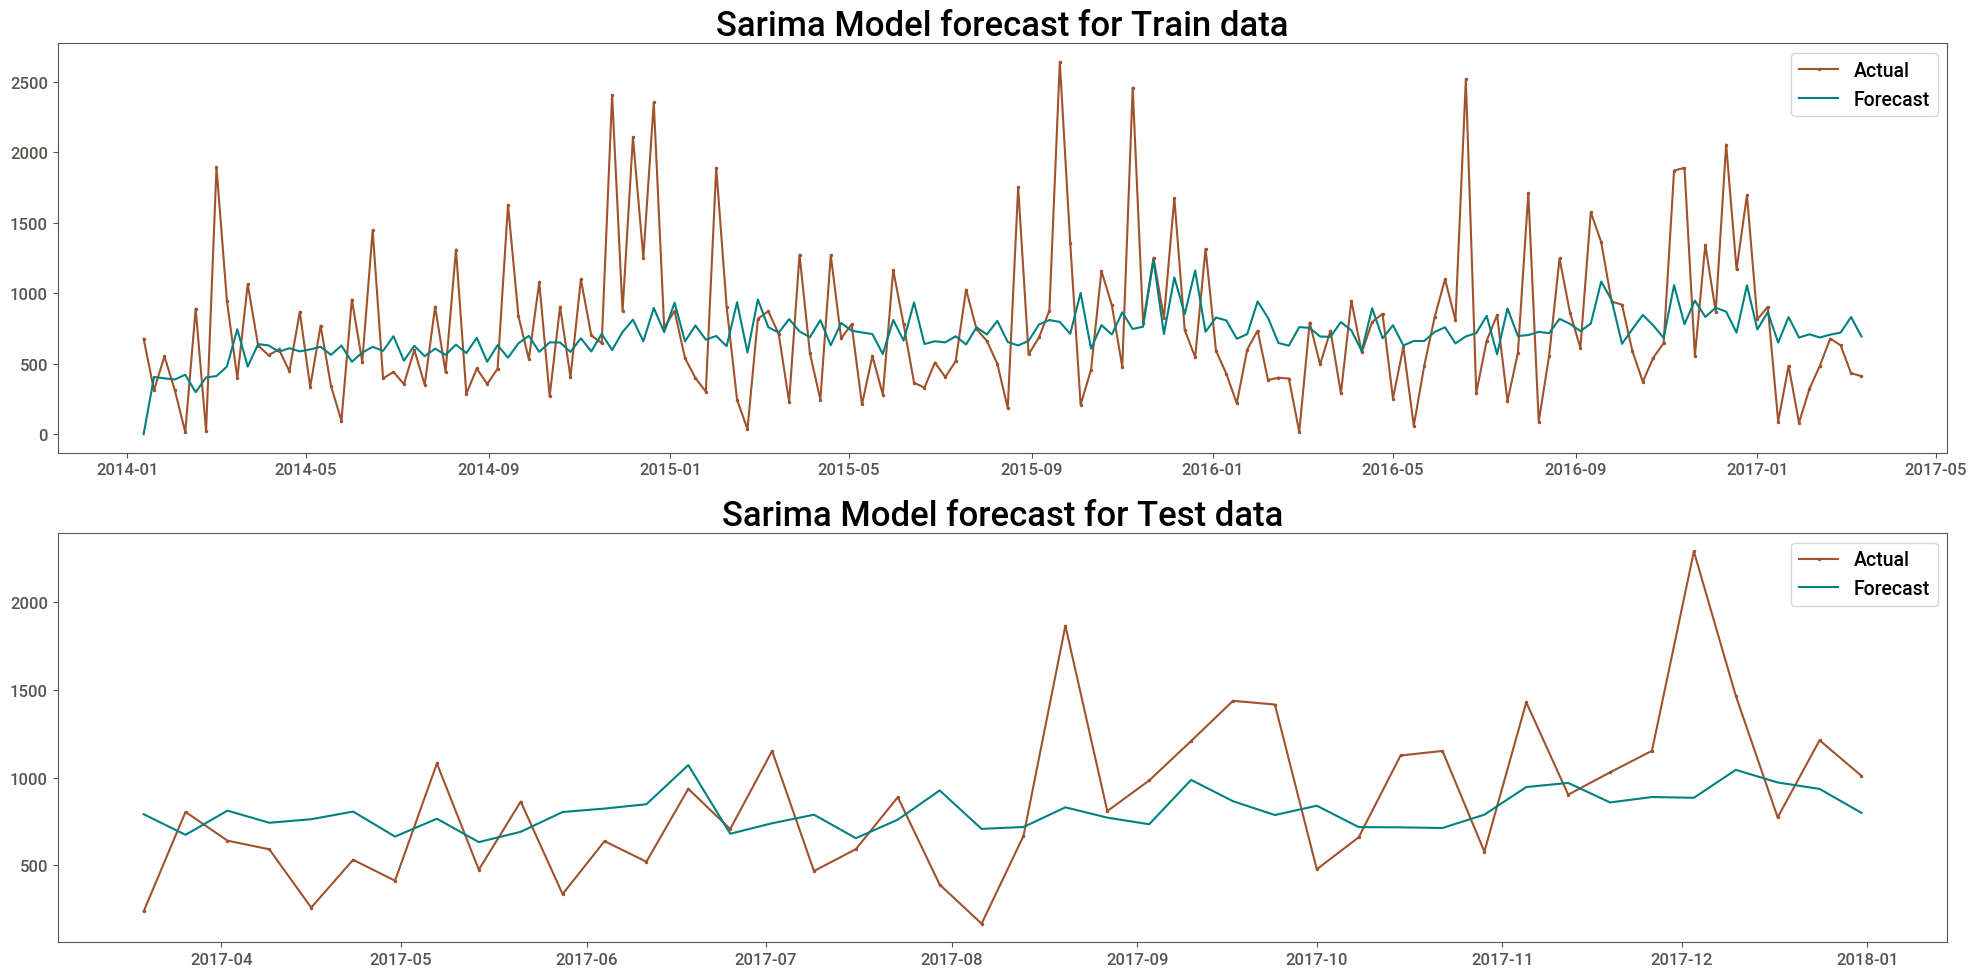

In [46]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title('Sarima Model forecast for Train data',fontsize=25)
plt.plot(train,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(s_train_fcast ,color = 'teal' , label = 'Forecast' )
plt.tick_params(labelsize=12)
plt.legend()

plt.subplot(2,1,2)
plt.title('Sarima Model forecast for Test data',fontsize=25)
plt.plot(test,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarima_forecast,color = 'teal' , label = 'Forecast' )
plt.tick_params(labelsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### <div class="alert alert-warning">Interpretation:
  __The above visual shows the training and the test forecast of sarima model and we can observe that the sarima model is able to predict slightly better as seasonality is present in the dataset and it is able to detect it partially.__
</div>

## Error in SARIMA model

In [47]:
sarima_rmse = mean_squared_error(test,sarima_forecast,squared=False)

print('RMSE :',sarima_rmse)

RMSE : 415.5487499071457


In [48]:
sarima_aic = sarima_model.aic
sarima_bic = sarima_model.bic

print('sarima aic:',sarima_aic)
print('sarima bic:',sarima_bic)

sarima aic: 2576.005249669308
sarima bic: 2610.23711534123


# <div style = 'background-color:wheat'> <center>Time series forecasting with SARIMAX </div>

In [49]:
df_new = furniture.groupby(['Order Date'])['Sales','Discount','Profit'].sum()
df_new.head(3)

Sales  Discount    Profit
Order Date                              
2014-01-06  2573.820       0.0  746.4078
2014-01-07    76.728       0.6  -53.7096
2014-01-10    51.940       0.0   21.2954

In [50]:
w2= df_new.resample('W').mean() #converting into weekly data

In [51]:
w2.shape

(208, 3)

In [52]:
row = int(len(w2)*0.8)   

In [53]:
train_d = (w2.iloc[:row])
test_d = (w2.iloc[row:])

exog_train = train_d[['Discount','Profit']] #exogenous train data
exog_test = test_d[['Discount','Profit']] #exogenous test data

In [54]:
print('Train data shape:',train_d.shape,'\nTest data shape:',test_d.shape)

Train data shape: (166, 3) 
Test data shape: (42, 3)


In [55]:
sarimax_model = SARIMAX(train_d.Sales,order=(2,0,3),seasonal_order=(2,0,3,52),exog= exog_train.values).fit() #model creation

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
sarimax_model.summary() #model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  166
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 52)   Log Likelihood               -1236.111
Date:                            Fri, 16 Dec 2022   AIC                           2498.222
Time:                                    21:55:12   BIC                           2538.678
Sample:                                01-12-2014   HQIC                          2514.643
                                     - 03-12-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1727.5570     70.124     24.636      0.000    1590.116    1864.998
x2             1.9667      0.242      8.117      0.000       1.492       2.442
ar.L1         -0.5612      0.119     -4.728      0.000      -0.794      -0.329
ar.L2         -0.9125      0.120     -7.617      0.000      -1.147      -0.678
ma.L1          0.4964      0.148      3.354      0.001       0.206       0.786
ma.L2          0.7863      0.162      4.860      0.000       0.469       1.103
ma.L3         -0.0888      0.107     -0.834      0.404      -0.298       0.120
ar.S.L52       0.0477    478.419   9.97e-05      1.000    -937.635     937.731
ar.S.L104      0.0677    374.993      0.000      1.000    -734.906     735.041
ma.S.L52       0.0140    481.909   2.91e-05      1.000    -944.510     944.538
ma.S.L104     -0.0069    349.140  -1.98e-05      1.000    -684.309     684.296
ma.S.L156      0.1048      9.514      0.011      0.991     -18.542      18.752
sigma2      1.791e+05      4.870   3.68e+04      0.000    1.79e+05    1.79e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               368.21
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             1.38
Prob(H) (two-sided):                  0.28   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.49e+20. Standard errors may be unstable.
"""

## Checking the goodness of the model

In [57]:
pvalue = sm.stats.acorr_ljungbox(sarimax_model.resid,lags=[30],return_df=True)['lb_pvalue'].values 

if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


In [58]:
s_train_fcast2 = sarimax_model.fittedvalues #predictions of the train data
s_train_fcast2

Order Date
2014-01-12    611.692527
2014-01-19    540.033436
2014-01-26    357.672484
2014-02-02    305.012782
2014-02-09    -16.752008
                 ...    
2017-02-12    690.669691
2017-02-19    920.689883
2017-02-26    648.043480
2017-03-05    578.045074
2017-03-12    493.044372
Freq: W-SUN, Length: 166, dtype: float64

In [59]:
sarimax_forecast = sarimax_model.forecast(len(test_d), exog=exog_test.values)

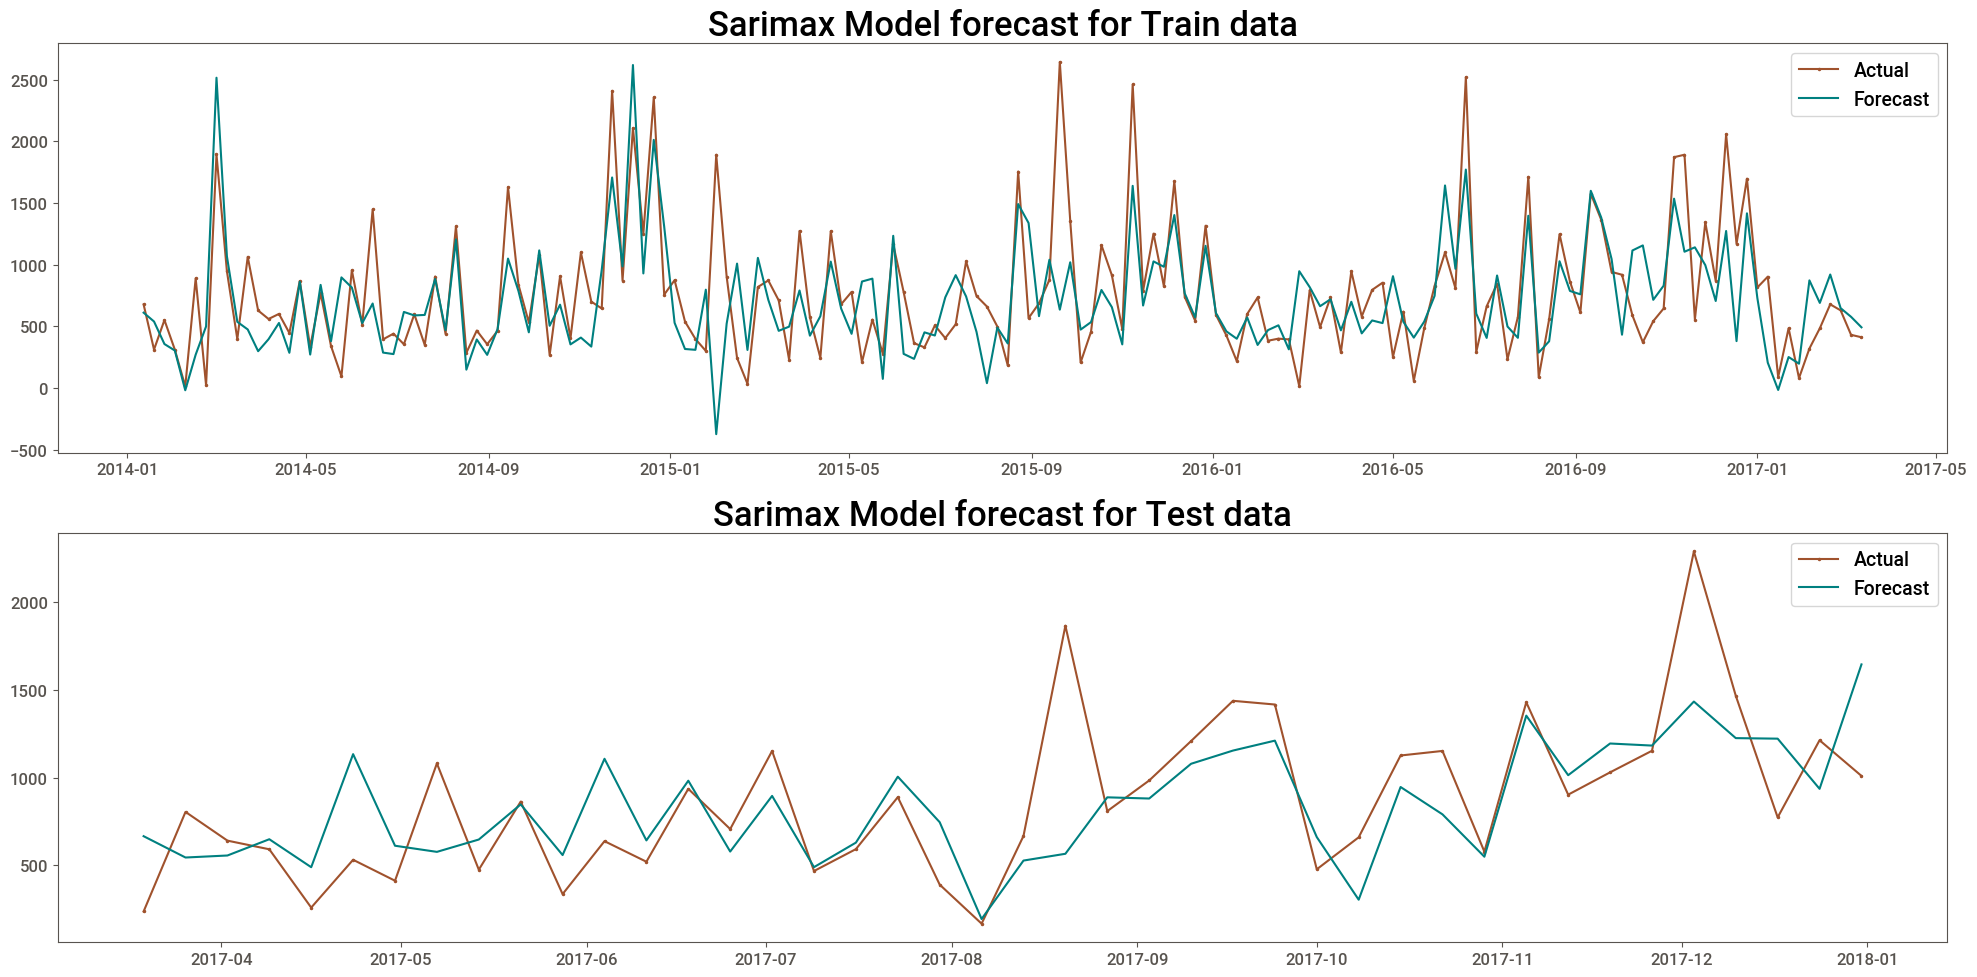

In [60]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title('Sarimax Model forecast for Train data',fontsize=25)
plt.plot(train_d['Sales'],marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(s_train_fcast2 ,color = 'teal' , label = 'Forecast' )
plt.tick_params(labelsize=12)
plt.legend()

plt.subplot(2,1,2)
plt.title('Sarimax Model forecast for Test data',fontsize=25)
plt.plot(test_d['Sales'],marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarimax_forecast,color = 'teal' , label = 'Forecast' )
plt.tick_params(labelsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### <div class="alert alert-warning">Interpretation:
  __The above visual shows the training and the test forecast of sarimax model and we can observe that the sarimax model is able to predict slightly better than the sarima model.__
</div>

## Error in SARIMA model

In [61]:
sarimax_rmse = mean_squared_error(test_d['Sales'],sarimax_forecast,squared=False)
print('RMSE :',sarimax_rmse)

RMSE : 352.07037940858066


In [62]:
sarimax_aic = sarimax_model.aic
sarimax_bic = sarimax_model.bic

print('sarimax aic:',sarimax_aic)
print('sarimax bic:',sarimax_bic)

sarimax aic: 2498.222196262336
sarimax bic: 2538.678037510971


# <div style = 'background-color:wheat'> <center>Final Interpretation </div>

In [63]:
data = pd.DataFrame([[sarima_rmse,sarima_aic,sarima_bic],
                      [sarimax_rmse,sarimax_aic,sarimax_bic]],
                     columns=['RMSE','AIC','BIC'],index=['Sarima model','Sarimax model'])

In [64]:
data

RMSE          AIC          BIC
Sarima model   415.548750  2576.005250  2610.237115
Sarimax model  352.070379  2498.222196  2538.678038

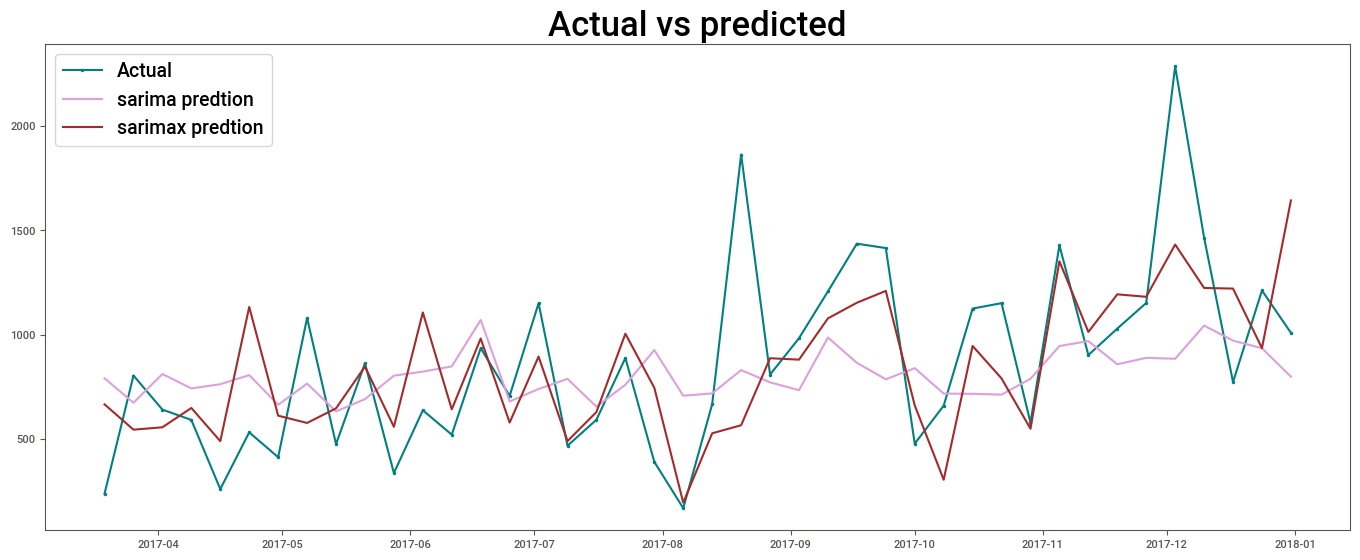

In [65]:
plt.figure(figsize=(15,6))


plt.title('Actual vs predicted',fontsize=25)
plt.plot(test,marker = '.', color = 'teal' , label = 'Actual')
plt.plot(sarima_forecast ,color = 'plum' , label = 'sarima predtion' )
plt.plot(sarimax_forecast ,color = 'brown' , label = 'sarimax predtion' )
plt.legend()
plt.show()

 So from the above dataframe and visual we can observe that:-
   - Sarimax model has less error.
   - Sarimax model has less AIC and BIC value.
   - And from the visual we can observe that,Sarimax model is near to the actual sales values.So we can use sarimax forecasting model for sales prediction of furniture product category.
   - Also as we can observe that Arima model can't be used as it cannot detect seasonality.
   

## Future predictions after year 2018

In [66]:
exogg=w2[['Profit','Discount']]
exogg

Profit  Discount
Order Date                      
2014-01-12  179.268750  0.150000
2014-01-19  -63.501100  0.387500
2014-01-26  118.542100  0.066667
2014-02-02   -6.615200  0.175000
2014-02-09    5.532800  0.000000
...                ...       ...
2017-12-03  -25.523386  0.871429
2017-12-10   86.619800  0.566667
2017-12-17 -130.020717  0.808333
2017-12-24   92.921233  0.458333
2017-12-31  111.999225  0.805000

[208 rows x 2 columns]

In [67]:
sarimax_model1 = sarimax_model1 = SARIMAX(w2.Sales,order=(2,0,3),seasonal_order=(2,0,3,52),exog= exogg.values).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
sarimax_forecast1 = sarimax_model1.forecast(60, exog=exogg.values[:60])

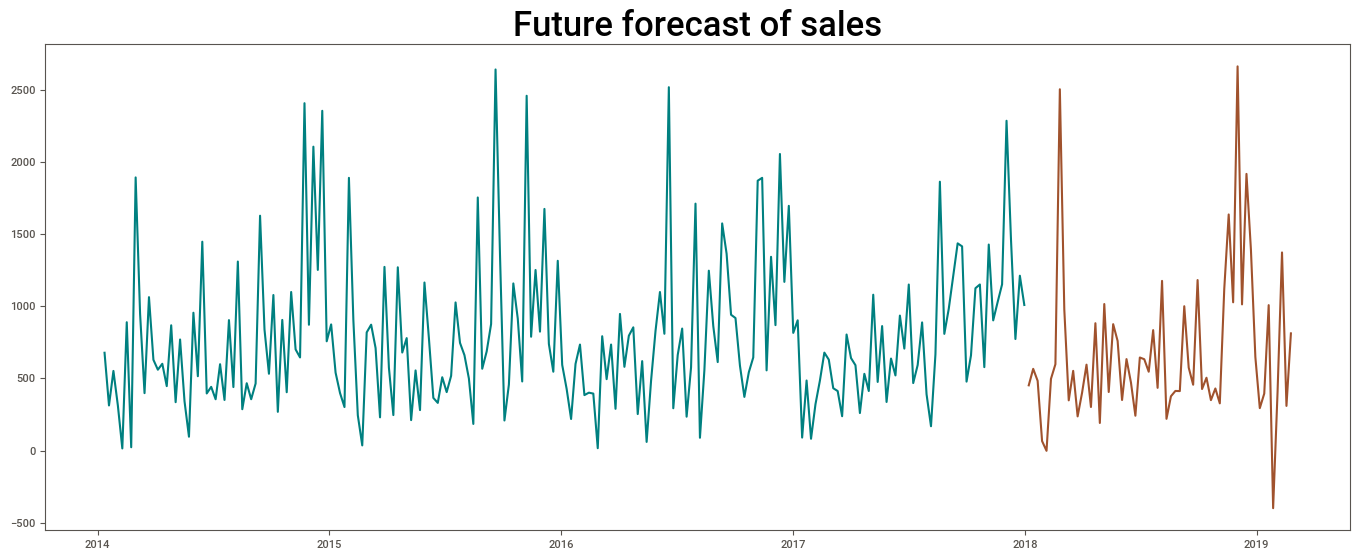

In [69]:
plt.figure(figsize=(15,6))
plt.title('Future forecast of sales',fontsize=25,fontweight="bold")
plt.plot(w2['Sales'], color = 'teal' , label = 'Actual')
plt.plot(sarimax_forecast1, color = 'sienna' , label = 'Actual')
plt.show()

### <div class="alert alert-warning">Interpretation:
  __The above visual shows future forecast for next 60 days, based on the exogoneus variables provided in the dataset.__
</div>

# <font color='teal'>Business Insights

- The sales of furniture are showing a positive trend.
- Chair products will see increased sales and profits.
- The sales of furniture are favourably impacted by the chair goods whereas the sales  are negatively impacted by table products.
- Discount on the sub- category should be kept in the same range as of chair is order to gain some profit on table sub-category


# <div class="alert alert-warning"><center>END<center></div>